In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
import os 
import warnings
from keras.models import load_model

In [2]:
new_train_dir = r'D:\Meghraj\Dataset\train'
new_test_dir = r'D:\Meghraj\Dataset\test'
new_val_dir = r'D:\Meghraj\Dataset\val'

Data preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224 
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)

validation_generator = validation_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    new_test_dir, 
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary' 
)

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


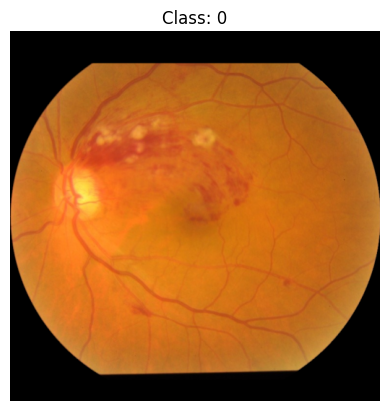

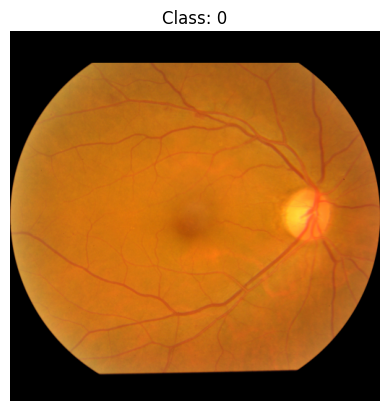

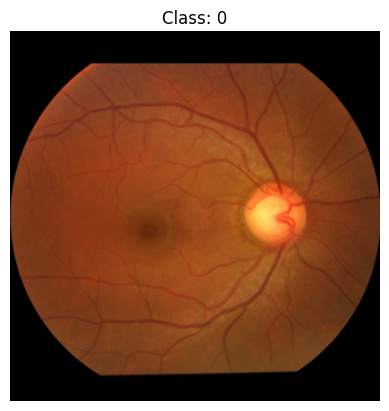

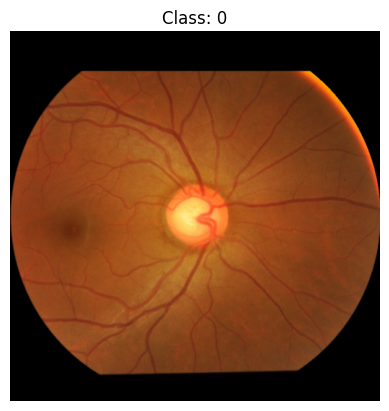

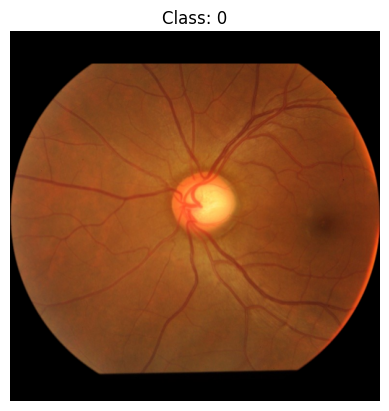

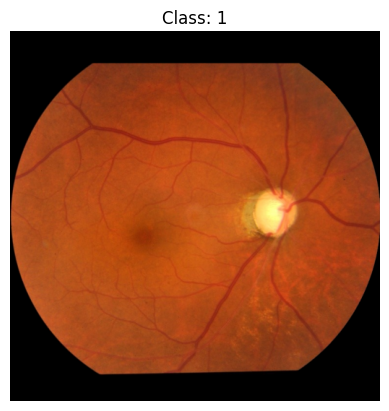

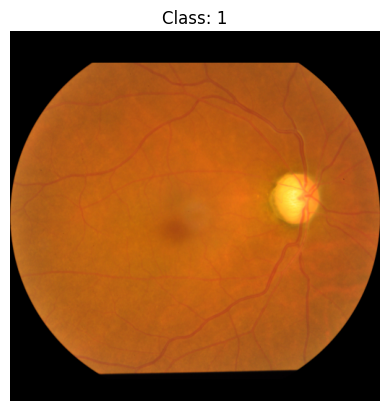

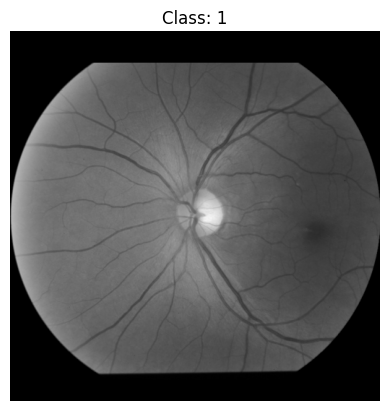

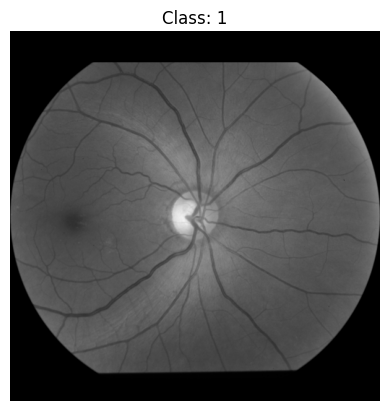

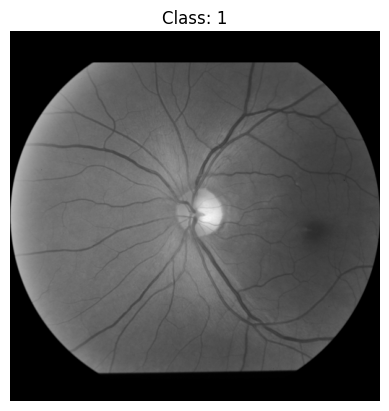

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

class_labels = os.listdir(new_train_dir)

for label in class_labels:
    class_dir = os.path.join(new_train_dir, label)
    image_files = os.listdir(class_dir)

    for i in range(min(5, len(image_files))):
        image_path = os.path.join(class_dir, image_files[i])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image)
        plt.title(f'Class: {label}')
        plt.axis('off')
        plt.show()

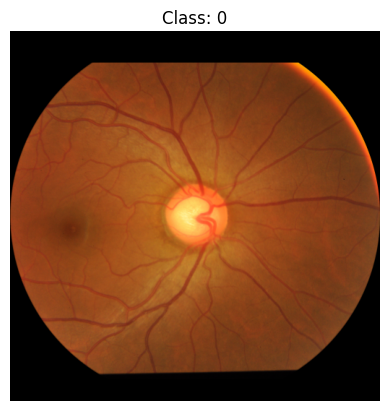

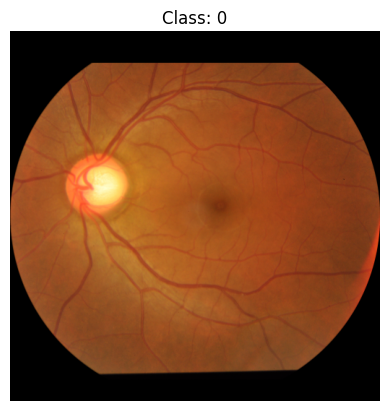

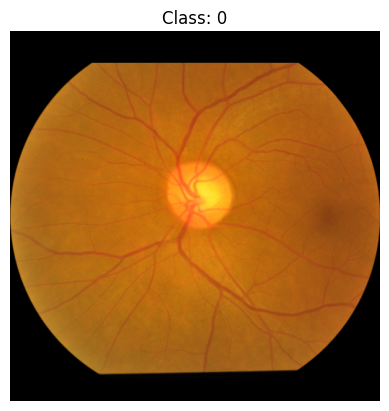

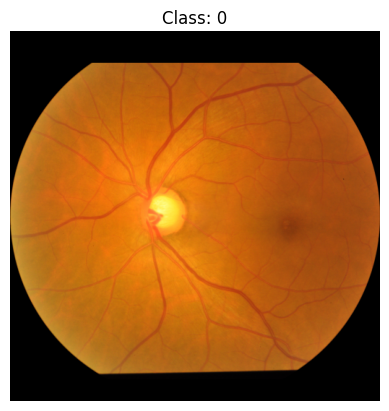

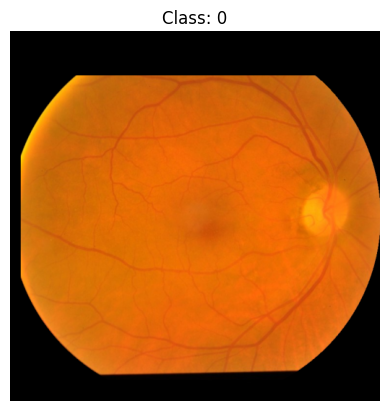

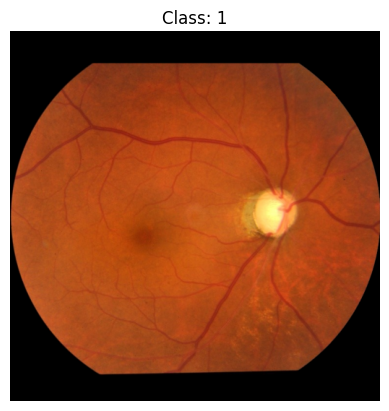

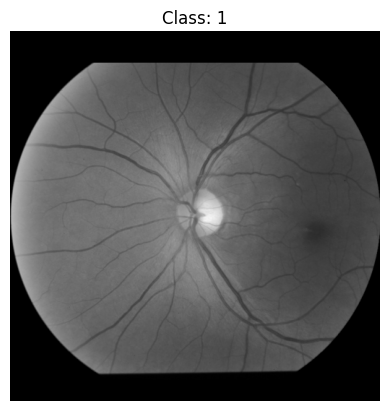

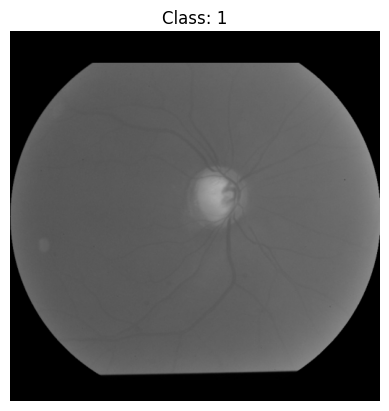

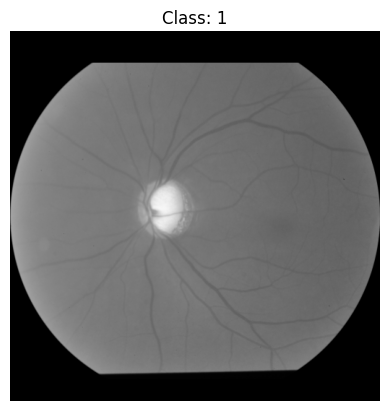

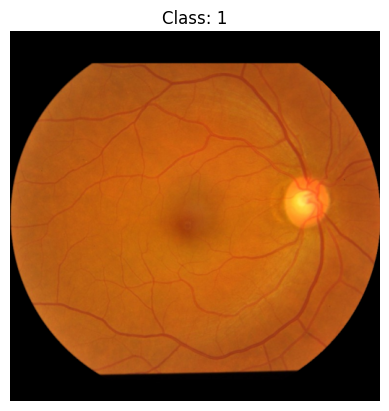

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

class_labels = os.listdir(new_test_dir)


for label in class_labels:
    class_dir = os.path.join(new_test_dir, label)
    image_files = os.listdir(class_dir)

    for i in range(min(5, len(image_files))):
        image_path = os.path.join(class_dir, image_files[i])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image)
        plt.title(f'Class: {label}')
        plt.axis('off')
        plt.show()

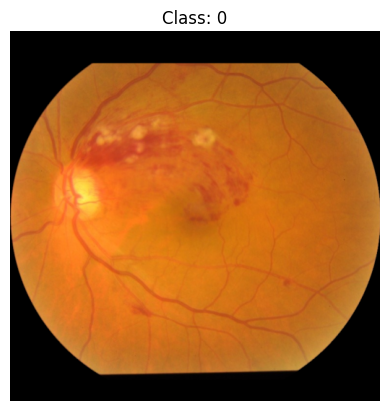

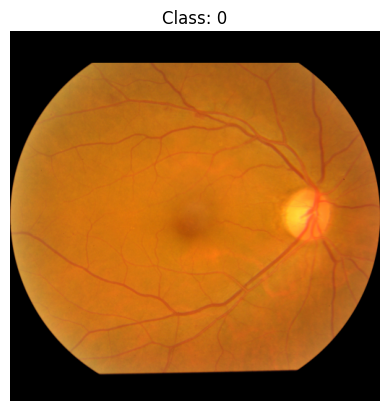

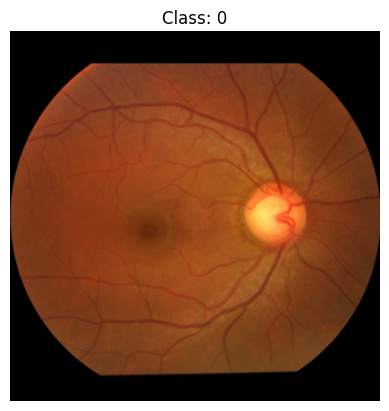

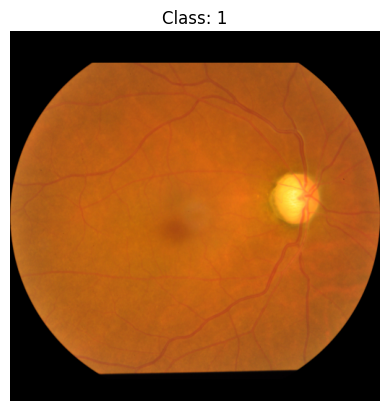

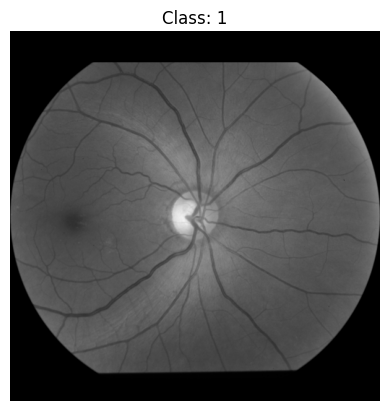

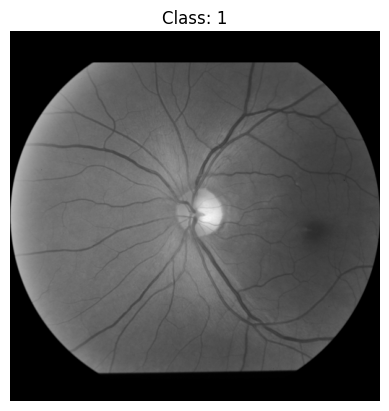

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

class_labels = os.listdir(new_val_dir)
 
for label in class_labels:
    class_dir = os.path.join(new_val_dir, label)
    image_files = os.listdir(class_dir)

    for i in range(min(3, len(image_files))):
        image_path = os.path.join(class_dir, image_files[i])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image)
        plt.title(f'Class: {label}')
        plt.axis('off')
        plt.show()

Model Architecture

In [7]:
import tensorflow as tf
from keras import layers, models,optimizers

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():   
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))  
     
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

    model.summary()
    
    model.save('custom_model')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                  

INFO:tensorflow:Assets written to: custom_model\assets


In [8]:
img_width, img_height = 224, 224
batch_size = 32 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)

validation_generator = validation_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary' 
)

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


In [9]:
print('The Length of train Generator',len(train_generator))
print('The Length of test Generator',len(test_generator))
print('The Length of validation Generator',len(validation_generator))

The Length of train Generator 270
The Length of test Generator 90
The Length of validation Generator 180


In [10]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),verbose=1,shuffle=True
    )

Epoch 1/20



270/270 [==============================] - 564s 2s/step - loss: 0.6065 - accuracy: 0.6870 - val_loss: 0.5490 - val_accuracy: 0.7399
Epoch 2/20
270/270 [==============================] - 414s 2s/step - loss: 0.5575 - accuracy: 0.7341 - val_loss: 0.5097 - val_accuracy: 0.7672
Epoch 3/20
270/270 [==============================] - 438s 2s/step - loss: 0.5254 - accuracy: 0.7507 - val_loss: 0.4991 - val_accuracy: 0.7616
Epoch 4/20
270/270 [==============================] - 427s 2s/step - loss: 0.5095 - accuracy: 0.7592 - val_loss: 0.4735 - val_accuracy: 0.7750
Epoch 5/20
270/270 [==============================] - 478s 2s/step - loss: 0.4927 - accuracy: 0.7679 - val_loss: 0.4514 - val_accuracy: 0.7879
Epoch 6/20
270/270 [==============================] - 486s 2s/step - loss: 0.4835 - accuracy: 0.7709 - val_loss: 0.4476 - val_accuracy: 0.7900
Epoch 7/20
270/270 [==============================] - 504s 2s/step - loss: 0.4739 - accuracy: 0.7772 - val_loss: 0.4452 - val_accuracy: 0.7952
Epoch 8/20

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

90/90 [==============================] - 85s 948ms/step - loss: 0.3962 - accuracy: 0.8177
Test Loss: 0.39618057012557983, Test Accuracy: 0.8176757097244263


In [12]:
model.save('custom.h5')

model = load_model('custom.h5')

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def get_predictions_and_labels(model, generator):
    predictions = []
    true_labels = []
  
    for _ in range(len(generator)):
        images, labels = generator.next()
        batch_predictions = model.predict(images)
        
        predictions.extend(np.round(batch_predictions))  # Assuming a binary classification task
        true_labels.extend(labels)
    
    return np.array(predictions), np.array(true_labels)

train_predictions, train_labels = get_predictions_and_labels(model, train_generator)

validation_predictions, validation_labels = get_predictions_and_labels(model, validation_generator)

test_predictions, test_labels = get_predictions_and_labels(model, test_generator)

def print_metrics(predictions, true_labels, dataset_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    print(f"Metrics for {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

print_metrics(train_predictions, train_labels, "Training Set")
print_metrics(validation_predictions, validation_labels, "Validation Set")
print_metrics(test_predictions, test_labels, "Test Set")

1/1 [==============================] - 0s 192ms/step
Metrics for Training Set:
Accuracy: 0.8223
Precision: 0.8465
Recall: 0.6593
F1 Score: 0.7412

Metrics for Validation Set:
Accuracy: 0.8279
Precision: 0.8905
Recall: 0.6295
F1 Score: 0.7376

Metrics for Test Set:
Accuracy: 0.8177
Precision: 0.8901
Recall: 0.6071
F1 Score: 0.7219



Fine tuning using Transfer learning

In [14]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet201
from keras import layers, models

img_width, img_height = 224, 224 
batch_size = 32 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():

    base_model = DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3)
)

    base_model.trainable = False

    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

    initial_learning_rate = 0.0001

    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy'])

    history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,validation_steps=len(validation_generator),
)

# Evaluate the model on the test set
    test_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Epoch 1/20



270/270 [==============================] - 1468s 5s/step - loss: 0.5538 - accuracy: 0.7201 - val_loss: 0.4905 - val_accuracy: 0.7661
Epoch 2/20
270/270 [==============================] - 1341s 5s/step - loss: 0.4891 - accuracy: 0.7687 - val_loss: 0.5115 - val_accuracy: 0.7646
Epoch 3/20
270/270 [==============================] - 1305s 5s/step - loss: 0.4777 - accuracy: 0.7755 - val_loss: 0.4487 - val_accuracy: 0.7896
Epoch 4/20
270/270 [==============================] - 1408s 5s/step - loss: 0.4664 - accuracy: 0.7809 - val_loss: 0.4471 - val_accuracy: 0.7917
Epoch 5/20
270/270 [==============================] - 1788s 7s/step - loss: 0.4576 - accuracy: 0.7866 - val_loss: 0.4419 - val_accuracy: 0.7948
Epoch 6/20
270/270 [==============================] - 2362s 9s/step - loss: 0.4573 - accuracy: 0.7907 - val_loss: 0.4324 - val_accuracy: 0.8006
Epoch 7/20
270/270 [==============================] - 14789s 55s/step - loss: 0.4482 - accuracy: 0.7977 - val_loss: 0.4308 - val_accuracy: 0.8013
E

In [15]:
model.save('customfine.h5')

model = load_model('customfine.h5')

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
epochs = 20 
fine_tuning_epoch = 20
total_epoch = epochs + fine_tuning_epoch

In [17]:
base_model.trainable = True
    
for layer in base_model.layers[:200]:
    layer.trainable = False

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
    loss='binary_crossentropy',
metrics=['accuracy']
)
history_fine_tuning = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=total_epoch,
    validation_data=validation_generator,validation_steps=len(validation_generator),
    verbose = 1,
    shuffle = True,
    initial_epoch = fine_tuning_epoch 
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               491776    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 18814017 (71.77 MB)
Trainable params: 492033 (1.88 MB)
Non-trainable params: 18321984 (69.89 MB)
_________

In [18]:
model.save('custom_mod.h5')

model = load_model('custom_mod.h5')

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def get_predictions_and_labels(model, generator):
    predictions = []
    true_labels = []
    
    for _ in range(len(generator)):
        images, labels = generator.next()
        batch_predictions = model.predict(images)
        
        predictions.extend(np.round(batch_predictions))  # Assuming a binary classification task
        true_labels.extend(labels)
    
    return np.array(predictions), np.array(true_labels)

train_predictions, train_labels = get_predictions_and_labels(model, train_generator)

validation_predictions, validation_labels = get_predictions_and_labels(model, validation_generator)

test_predictions, test_labels = get_predictions_and_labels(model, test_generator)

def print_metrics(predictions, true_labels, dataset_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    print(f"Metrics for {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

print_metrics(train_predictions, train_labels, "Training Set")
print_metrics(validation_predictions, validation_labels, "Validation Set")
print_metrics(test_predictions, test_labels, "Test Set")

1/1 [==============================] - 3s 3s/step
Metrics for Training Set:
Accuracy: 0.8431
Precision: 0.8862
Recall: 0.6809
F1 Score: 0.7701

Metrics for Validation Set:
Accuracy: 0.8356
Precision: 0.8930
Recall: 0.6499
F1 Score: 0.7523

Metrics for Test Set:
Accuracy: 0.8344
Precision: 0.8833
Recall: 0.6625
F1 Score: 0.7571



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from keras.preprocessing import image

# Assuming you have the model, true_labels, and predictions from the previous code

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

    plt.show()

# Function to plot ROC curve
def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

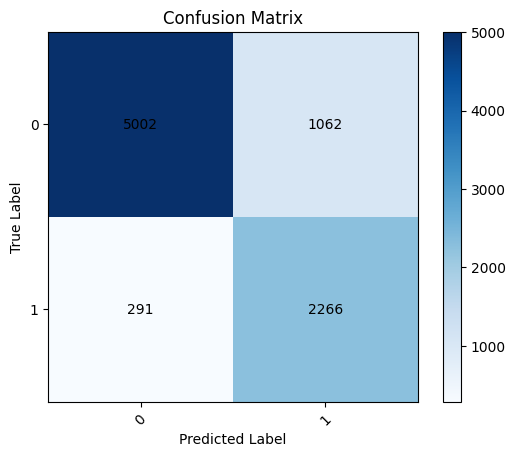

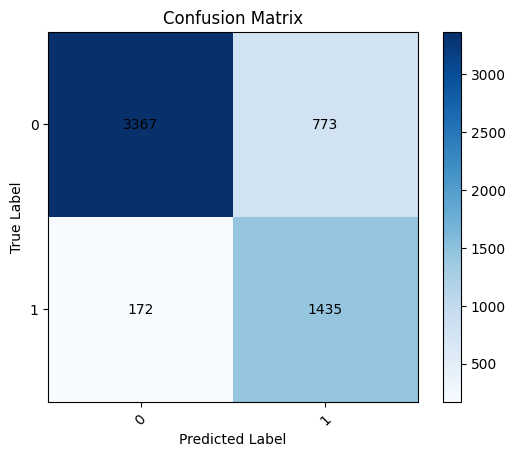

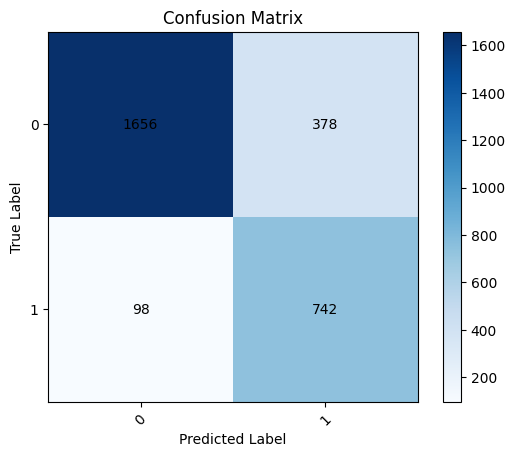

In [21]:
# Assuming binary classification (0 or 1)
classes = [0, 1]

# Visualize confusion matrices
plot_confusion_matrix(train_predictions, train_labels,  classes)
plot_confusion_matrix(validation_predictions, validation_labels, classes)
plot_confusion_matrix(test_predictions, test_labels, classes)

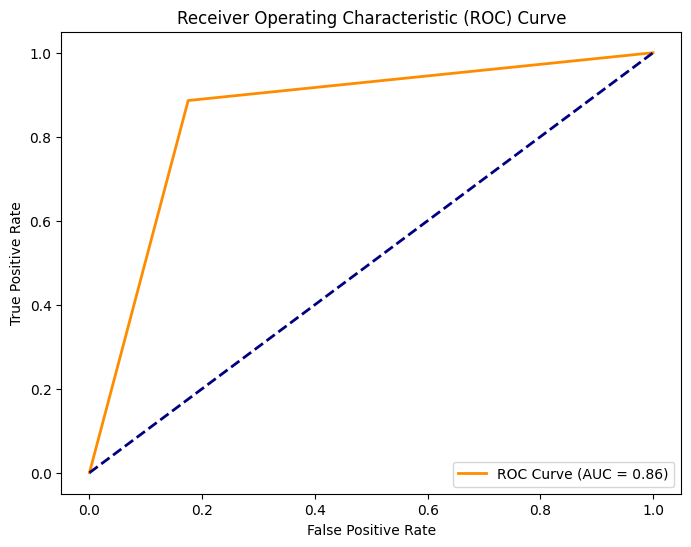

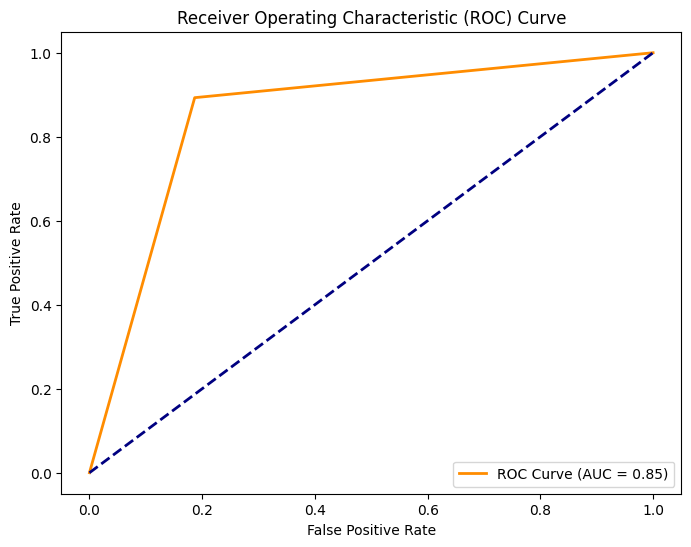

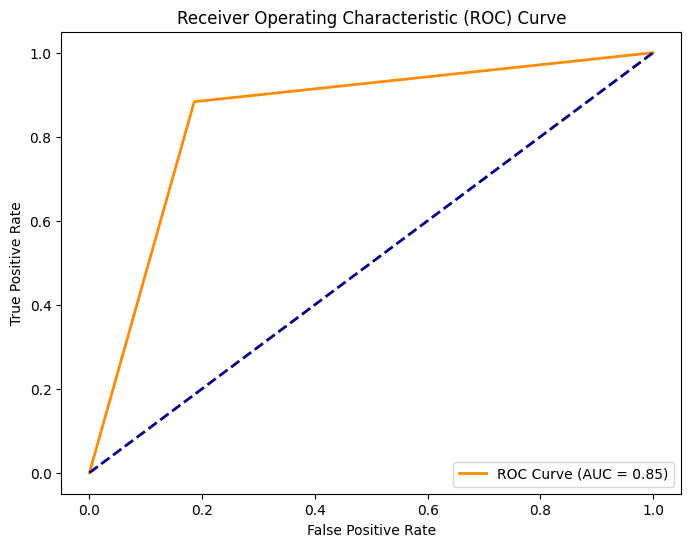

In [22]:
# Visualize ROC curves
plot_roc_curve(train_predictions, train_labels,)
plot_roc_curve(validation_predictions, validation_labels)
plot_roc_curve(test_predictions, test_labels)

In [23]:
from sklearn.metrics import classification_report

# Classification report for the Training Set
binary_train_predictions = np.round(train_predictions)

classification_report_train = classification_report(train_labels,binary_train_predictions)
print("Classification Report for Training Set:")
print(classification_report_train)

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      5293
         1.0       0.89      0.68      0.77      3328

    accuracy                           0.84      8621
   macro avg       0.86      0.81      0.83      8621
weighted avg       0.85      0.84      0.84      8621



In [24]:
binary_val_predictions = np.round(validation_predictions)

# Classification report for the Validation Set
classification_report_validation = classification_report(validation_predictions, validation_labels)
print("\nClassification Report for Validation Set:")
print(classification_report_validation)


Classification Report for Validation Set:
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88      4140
         1.0       0.65      0.89      0.75      1607

    accuracy                           0.84      5747
   macro avg       0.80      0.85      0.81      5747
weighted avg       0.87      0.84      0.84      5747



In [25]:
binary_test_predictions = np.round(test_predictions)

# Classification report for the Test Set
classification_report_test = classification_report(test_predictions, test_labels)
print("\nClassification Report for Test Set:")
print(classification_report_test)


Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      2034
         1.0       0.66      0.88      0.76       840

    accuracy                           0.83      2874
   macro avg       0.80      0.85      0.82      2874
weighted avg       0.86      0.83      0.84      2874



In [26]:
from keras.models import load_model

# Assuming model is already trained and saved
model.save('Glaucoma_detection_model.h5')

# Now you can load the model
model = load_model('Glaucoma_detection_model.h5')

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('Glaucoma_detection_model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def predict_image(model, image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(processed_image)
    return prediction

# Path to the image you want to test
image_path = 'D:\Meghraj\BEH-175.png'

# Make prediction
prediction = predict_image(model, image_path)

# Print prediction result
if prediction[0][0] > 0.5:
    print("The model predicts that the image indicates glaucoma.")
else:
    print("The model predicts that the image does not indicate glaucoma.")



1/1 [==============================] - 5s 5s/step
The model predicts that the image does not indicate glaucoma.
